In [ ]:
# Прийшлось зробити так, бо не воно чомусь не бачило мій встановленій keras-tuner і вибивало помилку що така бібліотека не встановлена

%pip install keras-tuner

  Using cached keras_tuner-1.4.8-py3-none-any.whl.metadata (5.6 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.8-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)

   ---------------------------------------- 2/2 [keras-tuner]

Note: you may need to restart the kernel to use updated packages.


In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner as kt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Нормалізація даних
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print(f"Розмір тренувальних даних: {x_train.shape}")
print(f"Розмір тестових даних: {x_test.shape}")


Розмір тренувальних даних: (60000, 28, 28)
Розмір тестових даних: (10000, 28, 28)


c:\Users\User\Desktop\Python_Data_Science\DZ12_Denisenko_Artem_Olegovich\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7944 - loss: 0.5775 - val_accuracy: 0.8467 - val_loss: 0.4374
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8415 - loss: 0.4330 - val_accuracy: 0.8535 - val_loss: 0.3960
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8513 - loss: 0.4060 - val_accuracy: 0.8402 - val_loss: 0.4373
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8594 - loss: 0.3847 - val_accuracy: 0.8630 - val_loss: 0.3650
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8630 - loss: 0.3697 - val_accuracy: 0.8707 - val_loss: 0.3472
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8679 - loss: 0.3606 - val_accuracy: 0.8749 - val_loss: 0.3373
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8717 - loss: 0.3454 - val_accuracy: 0.8750 - val_loss: 0.3446
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8741 - loss: 0.3411 - val_accuracy: 0.

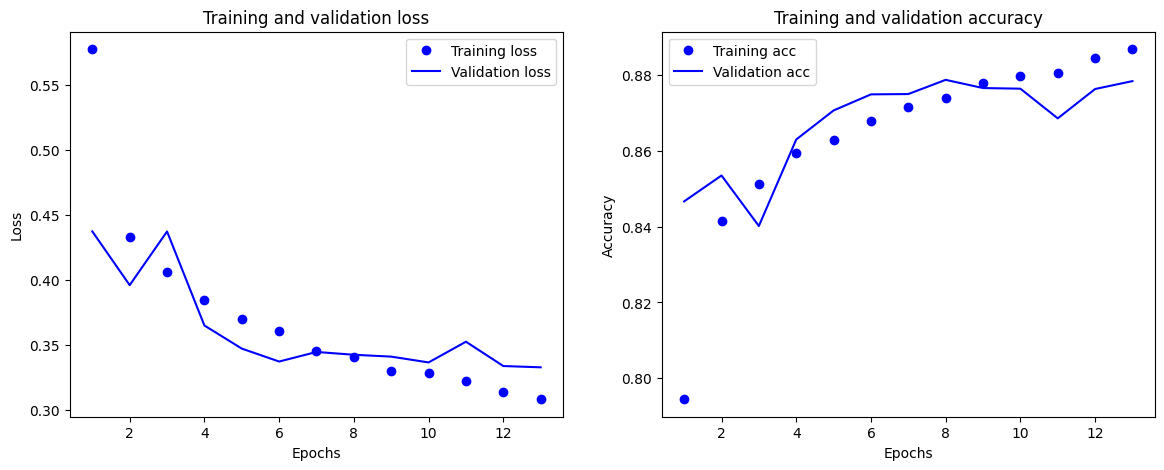

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Побудова архітектури

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Навчання з використанням Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    x_train, y_train,
    epochs=30, 
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Візуалізація результатів
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
# Фінальна перевірка на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nТочність на тестових даних: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8669 - loss: 0.3680

Точність на тестових даних: 0.8669


In [13]:
# Перевірка на випадковому зображенні
n = 5
predictions = model.predict(x_test[:n])
print("\nПеревірка передбачень:")
for i in range(n):
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    print(f"Зразок {i}: Прогноз: {class_names[predicted_label]} ({predicted_label}), Факт: {class_names[true_label]} ({true_label})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

Перевірка передбачень:
Зразок 0: Прогноз: Ankle boot (9), Факт: Ankle boot (9)
Зразок 1: Прогноз: Pullover (2), Факт: Pullover (2)
Зразок 2: Прогноз: Trouser (1), Факт: Trouser (1)
Зразок 3: Прогноз: Trouser (1), Факт: Trouser (1)
Зразок 4: Прогноз: Shirt (6), Факт: Shirt (6)


In [14]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    # Тюнінг кількості нейронів у першому шарі
    hp_units = hp.Int('units', min_value=128, max_value=512, step=64)
    model.add(layers.Dense(units=hp_units, activation='relu'))
    model.add(layers.Dropout(0.2))
    
    # Тюнінг learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

# Отримання найкращих гіперпараметрів
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Найкраща кількість нейронів: {best_hps.get('units')} 
Найкращий learning rate: {best_hps.get('learning_rate')}
""")

Trial 29 Complete [00h 00m 29s]
val_accuracy: 0.8829166889190674

Best val_accuracy So Far: 0.8892499804496765
Total elapsed time: 00h 05m 14s

Найкраща кількість нейронів: 512 
Найкращий learning rate: 0.001

